# One-Way Analysis of Variance

In an analysis of variance (ANOVA), the ideia is to partition the overall variance in the reponse into that due to each of the factors and the error

Terminology of ANOVA-type problems is different. Predictors are now all qualitative and are now typically factors with varies *levels*. The regression parameters are now called *effects*

We only consider cases where the paramters are fixed, but unknown (*fixed-effects* models)

## The model

Suppose we have a factor $\alpha$ occuring at $i=1,..., I$ levels, with $j=1,..., J_i$ observation per level


<p>&nbsp;</p>
\begin{split}
y_{ij}=\mu, \alpha_i + \epsilon_{ij}
\end{split}
<p>&nbsp;</p>

There are some options to set the analyis
1) $\mu = 0$ then ise $I$ different dummy variables to estimate $\alpha_i$for $i=1,..., I$
2) set $\alpha_1=0$ then $\mu$ represents the expected mean response for the first level of $\alpha_i$. The level one is then called *reference level* or *baseline level*
3) Set $\sum \alpha_i=0$ now $\mu$ reoresents the mean response over all levels of $\alpha_i$

Some preliminary graphical analysis is appropriate before fitting; we look for:
* equality of variance
* The need for transformation of the response 
* And outliers

Once the effects are estimates (parameters), we test for difference in the levels of the factor

<p>&nbsp;</p>
\begin{split}
H_0: y_{ij}= \mu + \epsilon_{ij}  \\
H_1: y_{ij}= \mu + \alpha_i + \epsilon_{ij}
\end{split}
<p>&nbsp;</p>

## An Example

Study related to blood coagulation time,
*  n=24 animals were randoml assigned to 4 treatments
* Treatments= 4 diets

In [2]:
library(faraway)

In [3]:
data(coagulation)
head(coagulation)

,coag,diet
,<dbl>,<fct>
1,62,A
2,60,A
3,63,A
4,59,A
5,63,B
6,67,B


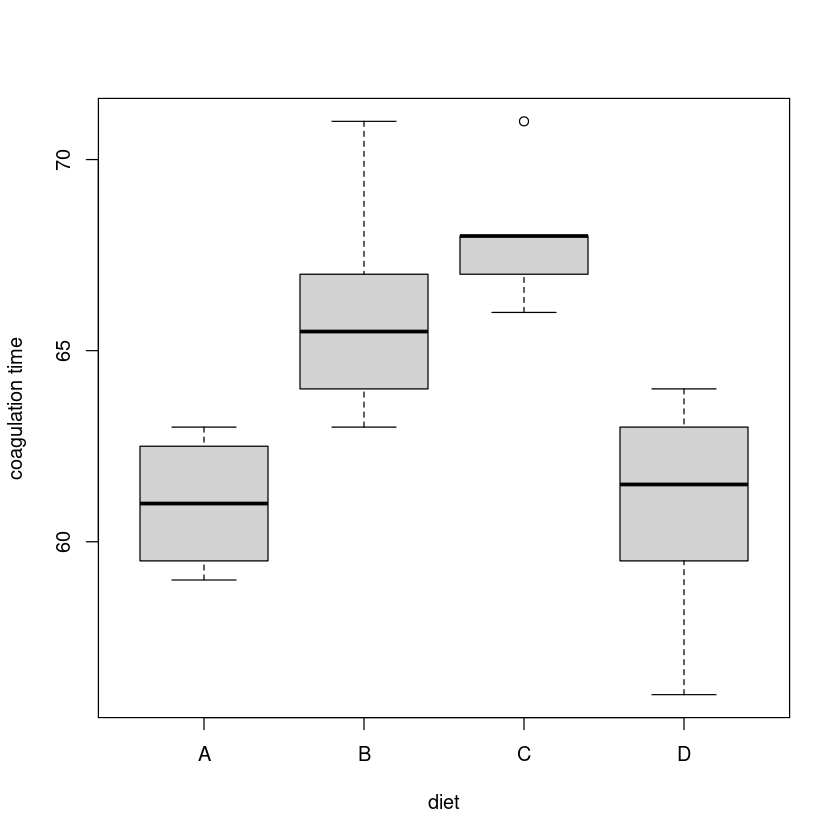

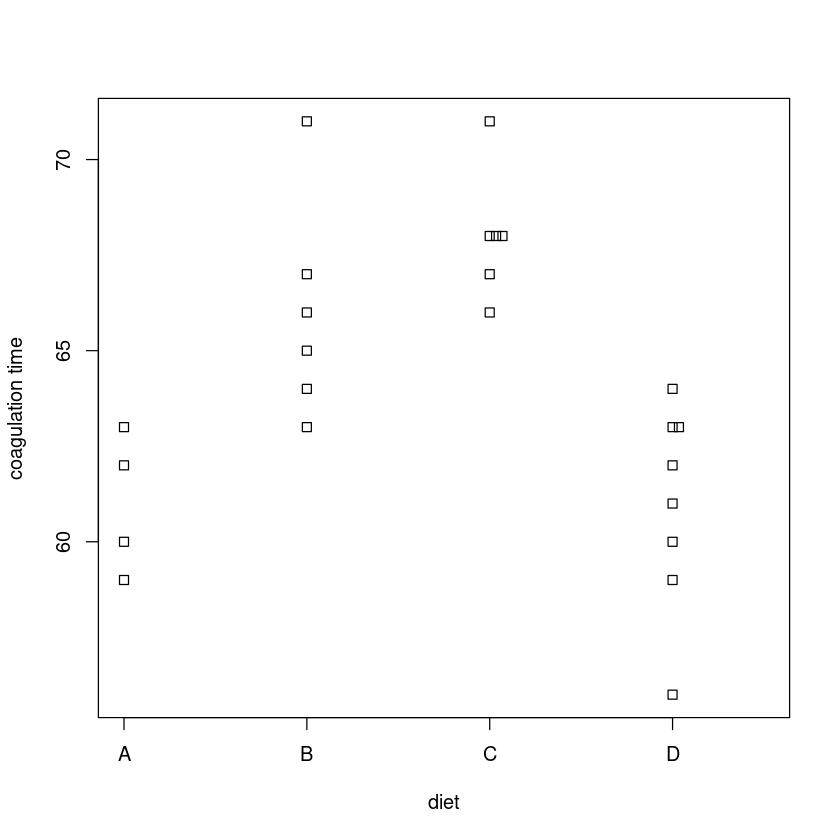

In [5]:
# lets plot the data first
plot(coag ~ diet, coagulation, ylab="coagulation time")
with(coagulation, stripchart(coag ~ diet, vertical = TRUE, method="stack", xlab="diet", ylab="coagulation time"))

* The stip plot is preferred here because of boxplot displays pooly when there are few datapoints.  For larger datasets, boxplots are better
* No outliers, skewness, or unequal variance

In [7]:
g = lm(coag ~ diet, coagulation)
summary(g)


Call:
lm(formula = coag ~ diet, data = coagulation)

Residuals:
   Min     1Q Median     3Q    Max 
 -5.00  -1.25   0.00   1.25   5.00 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.100e+01  1.183e+00  51.554  < 2e-16 ***
dietB       5.000e+00  1.528e+00   3.273 0.003803 ** 
dietC       7.000e+00  1.528e+00   4.583 0.000181 ***
dietD       1.288e-15  1.449e+00   0.000 1.000000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.366 on 20 degrees of freedom
Multiple R-squared:  0.6706,	Adjusted R-squared:  0.6212 
F-statistic: 13.57 on 3 and 20 DF,  p-value: 4.658e-05


* The p-value of the F-statistic suggest that there are significant differences between groups

In [39]:
head(model.matrix(g))

,(Intercept),dietB,dietC,dietD
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,1,0,0
6,1,1,0,0


In [9]:
# We can fit the model without the intercept
gi = lm(coag ~ diet -1, coagulation)
summary(gi)


Call:
lm(formula = coag ~ diet - 1, data = coagulation)

Residuals:
   Min     1Q Median     3Q    Max 
 -5.00  -1.25   0.00   1.25   5.00 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
dietA  61.0000     1.1832   51.55   <2e-16 ***
dietB  66.0000     0.9661   68.32   <2e-16 ***
dietC  68.0000     0.9661   70.39   <2e-16 ***
dietD  61.0000     0.8367   72.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.366 on 20 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9986 
F-statistic:  4399 on 4 and 20 DF,  p-value: < 2.2e-16


* Now we can directly read the level means. $R^2$ is not calculated because of the absence of an intercept
* F-statistic correspond to the hypothesis that the expected mean reponse is zero. Not very interesting
* To produce the right comparision in this case, we would need to fit a null model and compare with the full model

In [12]:
gnull = lm(coag ~ 1, coagulation)
summary(gnull)


Call:
lm(formula = coag ~ 1, data = coagulation)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.00  -2.25  -0.50   3.00   7.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.0000     0.7848   81.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.845 on 23 degrees of freedom


In [13]:
anova(gnull, gi)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23,340,NA,NA,NA,NA
2,20,112,3,228,13.57143,4.658471e-05


*  Exactly the same values as the first way
* Sum code

In [18]:
options(contrasts= c("contr.sum", "contr.poly"))
gs = lm(coag ~ diet, coagulation)
summary(gs)


Call:
lm(formula = coag ~ diet, data = coagulation)

Residuals:
   Min     1Q Median     3Q    Max 
 -5.00  -1.25   0.00   1.25   5.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.0000     0.4979 128.537  < 2e-16 ***
diet1        -3.0000     0.9736  -3.081 0.005889 ** 
diet2         2.0000     0.8453   2.366 0.028195 *  
diet3         4.0000     0.8453   4.732 0.000128 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.366 on 20 degrees of freedom
Multiple R-squared:  0.6706,	Adjusted R-squared:  0.6212 
F-statistic: 13.57 on 3 and 20 DF,  p-value: 4.658e-05


*  The overall mean is 64 while the estimated response for A is 3 less than the overall mean (61)
* Given that we  are using sum of contrasts $\hat \alpha_D= -(-3+2+4) = -3$ so the mean for D is $64-3=61$
* We can use any of these three methods. The constant $\mu=0$ is less convenient given the extra step to generate F-test. 
* The treatment coding is most appropriate when the reference level is set to a possible control group

## Diagnostics

There are fewer diagnostics to do for ANOVA: residuals and fitted values and qq-plot
* It makes  no sense to trasform the predictor, but it is reasonable to consider transforming the response

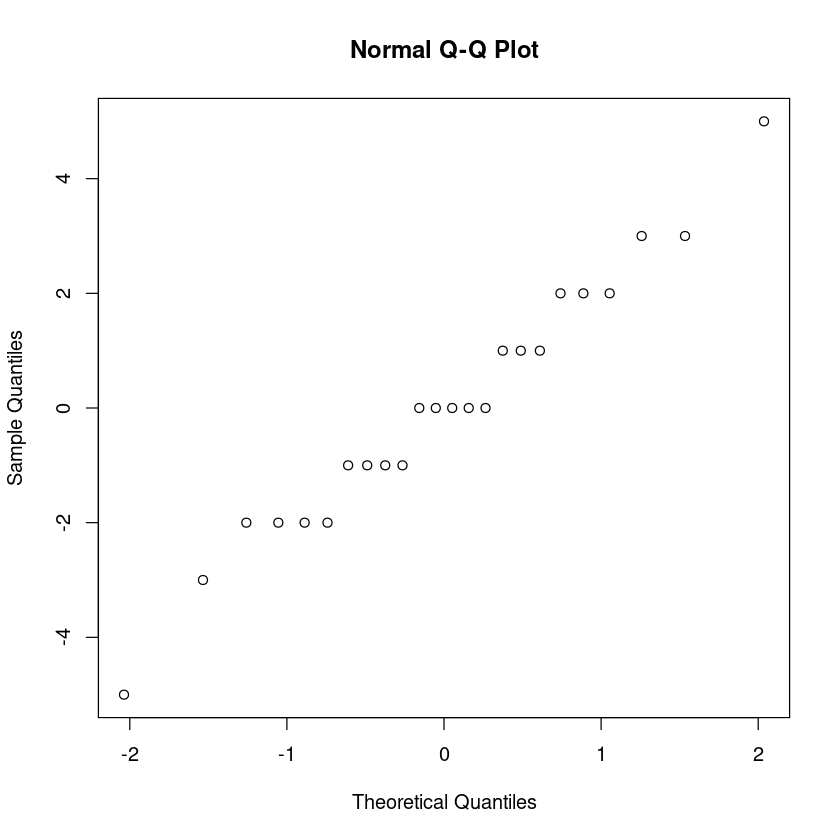

In [19]:
qqnorm(residuals(g))

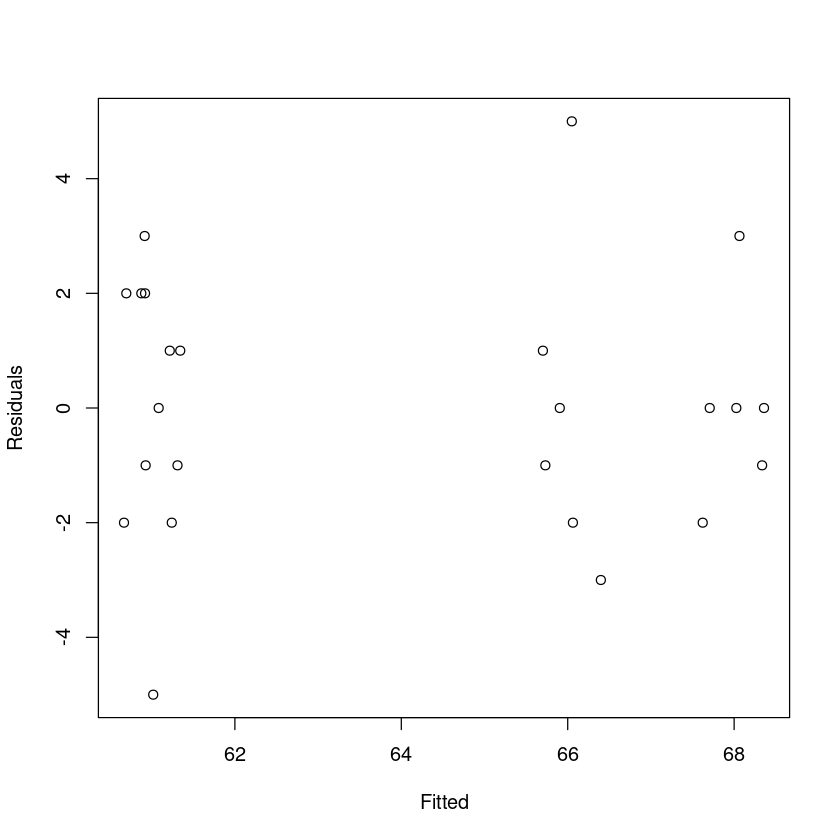

In [20]:
plot(jitter(fitted(g)), residuals(g), xlab="Fitted", ylab="Residuals")

*  We can examine the homogeneity of the error variance using Levene's  test. 
1) First compute the absolute values of the residuals
2) Use it as reponse in a new one-way ANOVA
3) to reduce the influence of outliers, we use median rather than the mean

In [38]:
med = with(coagulation, tapply(coag, diet, median))
med
ar  = with(coagulation, abs(coag ~med[diet]))
ar
#anova(lm(ar ~ diet, coagulation))

A    B    C    D 
61.0 65.5 68.0 61.5

ERROR: Error in abs(coag ~ med[diet]): non-numeric argument to mathematical function


## Pairwise Comparisons

After detecting some differences in the levels of the factors, interest centers on which levels or combinations of levels are different 

<p>&nbsp;</p>
\begin{split}
\hat \alpha_i - \hat \alpha_j \pm t_{df}^{\alpha/2}se(\hat \alpha_i - \hat \alpha_j)
\end{split}
<p>&nbsp;</p>

whereas

<p>&nbsp;</p>
\begin{split}
se(\hat \alpha_i - \hat \alpha_j) = \hat \sigma \sqrt{\frac{1}{j_i} + \frac{1}{j_j}} 
\end{split}
<p>&nbsp;</p>


In [41]:
round(qt(0.975, 20), 3)

[1] 2.086

In [42]:
c(5 - 2.086 * 1.53, 5 + 2.086 * 1.53)

[1] 1.80842 8.19158

* Zero is not in the interval, thus the difference is significant
* This approach is fine for one test, but we are likely interested in multiple comparisons

For experiments with more levels, the true type I error gets even higher.
Using the t-based CIs for multiple comparison is called the least significant difference (LSD) method, but it is not recommended

* If we only do a few selected comparision, then the bonferroni correction could be implemented

##### The solution can be testing multiple comparisons using *Tukey's honest significant difference (HSD)* 
* It depends on the studentized range distribution 
* $X_1,..., X_n$ be i.i.d. $N(\mu, \sigma^2)$ and $R=max_i X_i - min_i X_i$ be the range: $\frac{R}{\hat \sigma}$


<p>&nbsp;</p>
\begin{split}
\hat \alpha_i - \hat \alpha_j \pm \frac{q_{1,df}}{\sqrt{2}} se(\hat \alpha_i - \hat \alpha_j)  
\end{split}
<p>&nbsp;</p>

* When the sample sizes are very unequal, Tukey's HSD becomes too conservative


In [44]:
round(qtukey(0.95, 4, 20)/sqrt(2), 3)

[1] 2.799

In [45]:
c(5 - 2.8* 1.53, 5 + 2.8 * 1.53)

[1] 0.716 9.284

* More conveniently 

In [46]:
TukeyHSD(aov(coag ~ diet, coagulation))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = coag ~ diet, data = coagulation)

$diet
    diff         lwr       upr     p adj
B-A    5   0.7245544  9.275446 0.0183283
C-A    7   2.7245544 11.275446 0.0009577
D-A    0  -4.0560438  4.056044 1.0000000
C-B    2  -1.8240748  5.824075 0.4766005
D-B   -5  -8.5770944 -1.422906 0.0044114
D-C   -7 -10.5770944 -3.422906 0.0001268
